<a href="https://colab.research.google.com/github/neehasajja/waymo-opendataset/blob/main/validation/camera_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip3 install waymo-open-dataset-tf-2-6-0

In [10]:
!pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyarrow.parquet as pq
import pandas as pd

# Set the path to the Parquet file
parquet_file_path = '/content/drive/MyDrive/validation/camera_segmentation/file1.parquet'

# Read the Parquet file into a Pyarrow table
table = pq.read_table(parquet_file_path)

# Convert the table to a Pandas DataFrame
df = table.to_pandas()

# Print the first 10 rows of the DataFrame
print(df.head(10))

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image

# Load the parquet file into a pandas dataframe
df = pd.read_parquet('/content/drive/MyDrive/validation/camera_segmentation/file1.parquet')

# Extract the segmentation label data from the dataframe
segmentation_data = df['[CameraSegmentationLabelComponent].panoptic_label'][0]

# Convert the segmentation label data into a NumPy array
segmentation_array = np.array(segmentation_data)

# Create a PIL Image object using the NumPy array
segmentation_image = Image.fromarray(segmentation_array)

# Show the PIL Image
segmentation_image.show()

In [4]:
print(df.columns)

Index(['key.segment_context_name', 'key.frame_timestamp_micros',
       'key.camera_name',
       '[CameraSegmentationLabelComponent].panoptic_label_divisor',
       '[CameraSegmentationLabelComponent].panoptic_label',
       '[CameraSegmentationLabelComponent].instance_id_to_global_id_mapping.local_instance_ids',
       '[CameraSegmentationLabelComponent].instance_id_to_global_id_mapping.global_instance_ids',
       '[CameraSegmentationLabelComponent].instance_id_to_global_id_mapping.is_tracked',
       '[CameraSegmentationLabelComponent].sequence_id',
       '[CameraSegmentationLabelComponent].num_cameras_covered'],
      dtype='object')


In [6]:
import pyarrow.parquet as pq

filename = '/content/drive/MyDrive/validation/camera_segmentation/file1.parquet'

pq_file = pq.ParquetFile(filename)
num_tables = pq_file.num_row_groups

print("Number of tables in the file:", num_tables)

Number of tables in the file: 1


In [7]:
import pandas as pd
import numpy as np

# Load the parquet file into a pandas dataframe
df = pd.read_parquet('/content/drive/MyDrive/validation/camera_segmentation/file1.parquet')

# Extract the segmentation label data from the dataframe
segmentation_data = df['[CameraSegmentationLabelComponent].panoptic_label'][0]

# Convert the segmentation label data into a NumPy array
segmentation_array = np.array(segmentation_data)

# Print the NumPy array
print(segmentation_array)


b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x07\x80\x00\x00\x05\x00\x10\x00\x00\x00\x00\xd3v\xcc\xa8\x00\x00 \x00IDATx\x9c\xed\xddO\xa8\xa5g\x9e\xd8\xf7W\xf2\x05\x15\xcc\x80\x85eO_h\xe3\xe9\xa4\x1cR\xa0\x8dp\'\x83q6\x8d\xdb\x13\x15\xa3\x99\x0e\xe9E\xd3Y\xd8\xc8\x8b\xe9x\xe9\x18cj\x99\xa50&SK\xbb\xc9BLo\x84\x16\r\xa63C+v\x9b^\x19cg\x8c6\r\x15\xa6\xcb\xf6,\x1an\xc5\xa3P\x81\x16\xa8\xc9M;\x8b\xa3\xa3\xf3\xef=\xe7\xbc\x7f\x9e\xff\xcf\xe7\xa3\x85\xa4\xaa[\xf7\x9e\xba\xe7\xdc\xf7}\xbf\xe7\xf7\xbc\xef\xfb\xca\xdf\xfe`\x00\x00\x00\x80\xe6\xbd\x9a\xfb\x01\x00\x00\x00@\n\x02\x18\x00\x00\x80.\x08`\x00\x00\x00\xba \x80\x01\x00\x00\xe8\x82\x00\x06\x00\x00\xa0\x0b\x02\x18\x00\x00\x80.\x08`\x00\x00\x00\xba \x80\x01\x00\x00\xe8\x82\x00\x06\x00\x00\xa0\x0b\x02\x18\x00\x00\x80.\x08`\x00\x00\x00\xba \x80\x01\x00\x00\xe8\x82\x00\x06\x00\x00\xa0\x0b\x02\x18\x00\x00\x80.\x08`\x00\x00\x00\xba \x80\x01\x00\x00\xe8\x82\x00\x06\x00\x00\xa0\x0b\x02\x18\x00\x00\x80.\x08`\x00\x00\x00\xba \x80\x01\x00\x00\xe8\x82

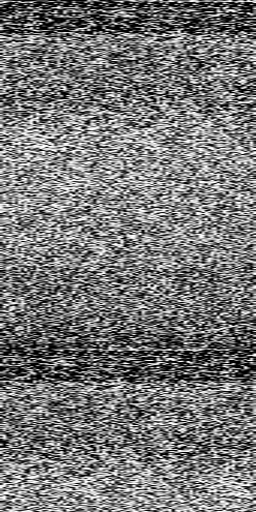

In [20]:
import pandas as pd
import numpy as np
from PIL import Image

# Load the parquet file into a pandas dataframe
df = pd.read_parquet('/content/drive/MyDrive/validation/camera_segmentation/file1.parquet')

# Extract the segmentation label data from the dataframe
segmentation_data = df['[CameraSegmentationLabelComponent].panoptic_label'][0]

# Decode the segmentation data from bytes to a NumPy array
segmentation_array = np.frombuffer(segmentation_data, dtype=np.uint8)

# Reshape the segmentation array into a compatible shape
# You can try different shapes until you find one that works
segmentation_array = np.resize(segmentation_array, (495, 85))
# Resize the segmentation array to the desired shape
new_shape = (256, 512)
segmentation_image = Image.fromarray(segmentation_array).resize(new_shape)

# Show the PIL Image
segmentation_image.show()


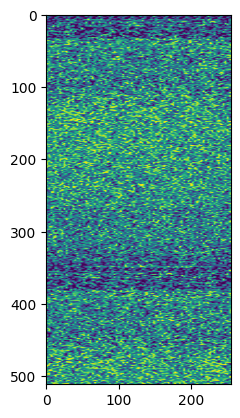

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the parquet file into a pandas dataframe
df = pd.read_parquet('/content/drive/MyDrive/validation/camera_segmentation/file1.parquet')

# Extract the segmentation label data from the dataframe
segmentation_data = df['[CameraSegmentationLabelComponent].panoptic_label'][0]

# Decode the segmentation data from bytes to a NumPy array
segmentation_array = np.frombuffer(segmentation_data, dtype=np.uint8)

# Reshape the segmentation array into a compatible shape
# You can try different shapes until you find one that works
segmentation_array = np.resize(segmentation_array, (495, 85))
# Resize the segmentation array to the desired shape
new_shape = (256, 512)
segmentation_image = Image.fromarray(segmentation_array).resize(new_shape)

# Show the PIL Image using matplotlib.pyplot
plt.imshow(segmentation_image)
plt.show()

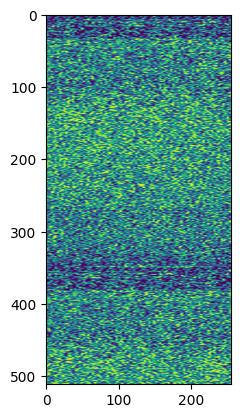

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the parquet file into a pandas dataframe
df = pd.read_parquet('/content/drive/MyDrive/validation/camera_segmentation/file1.parquet')

# Extract the segmentation label data from the dataframe
segmentation_data = df['[CameraSegmentationLabelComponent].panoptic_label'][0]

# Decode the segmentation data from bytes to a NumPy array
segmentation_array = np.frombuffer(segmentation_data, dtype=np.uint8)

# Reshape the segmentation array into a compatible shape
# You can try different shapes until you find one that works
segmentation_array = np.resize(segmentation_array, (495, 85))
# Resize the segmentation array to the desired shape
new_shape = (256, 512)
segmentation_image = Image.fromarray(segmentation_array).resize(new_shape, resample=Image.ANTIALIAS)

# Show the PIL Image using matplotlib.pyplot
plt.imshow(segmentation_image)
plt.show()

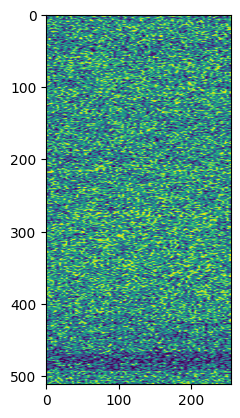

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the parquet file into a pandas dataframe
df = pd.read_parquet('/content/drive/MyDrive/validation/camera_segmentation/file3.parquet')

# Extract the segmentation label data from the dataframe
segmentation_data = df['[CameraSegmentationLabelComponent].panoptic_label'][0]

# Decode the segmentation data from bytes to a NumPy array
segmentation_array = np.frombuffer(segmentation_data, dtype=np.uint8)

# Reshape the segmentation array into a compatible shape
# You can try different shapes until you find one that works
segmentation_array = np.resize(segmentation_array, (495, 85))
# Resize the segmentation array to the desired shape
new_shape = (256, 512)
segmentation_image = Image.fromarray(segmentation_array).resize(new_shape, resample=Image.ANTIALIAS)

# Show the PIL Image using matplotlib.pyplot
plt.imshow(segmentation_image)
plt.show()

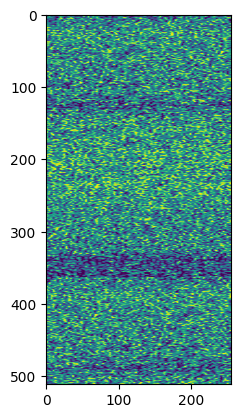

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the parquet file into a pandas dataframe
df = pd.read_parquet('/content/drive/MyDrive/validation/camera_segmentation/file4.parquet')

# Extract the segmentation label data from the dataframe
segmentation_data = df['[CameraSegmentationLabelComponent].panoptic_label'][0]

# Decode the segmentation data from bytes to a NumPy array
segmentation_array = np.frombuffer(segmentation_data, dtype=np.uint8)

# Reshape the segmentation array into a compatible shape
# You can try different shapes until you find one that works
segmentation_array = np.resize(segmentation_array, (495, 85))
# Resize the segmentation array to the desired shape
new_shape = (256, 512)
segmentation_image = Image.fromarray(segmentation_array).resize(new_shape, resample=Image.ANTIALIAS)

# Show the PIL Image using matplotlib.pyplot
plt.imshow(segmentation_image)
plt.show()

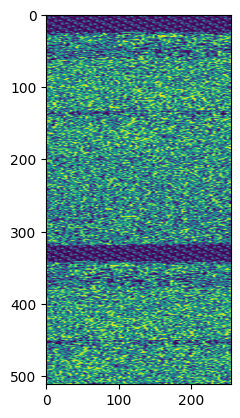

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the parquet file into a pandas dataframe
df = pd.read_parquet('/content/drive/MyDrive/training/camera_segmentation/file1.parquet')

# Extract the segmentation label data from the dataframe
segmentation_data = df['[CameraSegmentationLabelComponent].panoptic_label'][0]

# Decode the segmentation data from bytes to a NumPy array
segmentation_array = np.frombuffer(segmentation_data, dtype=np.uint8)

# Reshape the segmentation array into a compatible shape
# You can try different shapes until you find one that works
segmentation_array = np.resize(segmentation_array, (495, 85))
# Resize the segmentation array to the desired shape
new_shape = (256, 512)
segmentation_image = Image.fromarray(segmentation_array).resize(new_shape, resample=Image.ANTIALIAS)

# Show the PIL Image using matplotlib.pyplot
plt.imshow(segmentation_image)
plt.show()

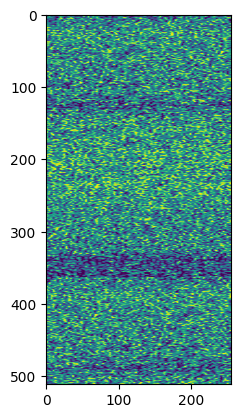

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the parquet file into a pandas dataframe
df = pd.read_parquet('/content/drive/MyDrive/validation/camera_segmentation/file4.parquet')

# Extract the segmentation label data from the dataframe
segmentation_data = df['[CameraSegmentationLabelComponent].panoptic_label'][0]

# Decode the segmentation data from bytes to a NumPy array
segmentation_array = np.frombuffer(segmentation_data, dtype=np.uint8)

# Reshape the segmentation array into a compatible shape
# You can try different shapes until you find one that works
segmentation_array = np.resize(segmentation_array, (495, 85))

# Resize the segmentation array to the desired shape
new_shape = (256, 512)
segmentation_image = Image.fromarray(segmentation_array).resize(new_shape, resample=Image.ANTIALIAS)

# Show the PIL Image using matplotlib.pyplot
plt.imshow(segmentation_image)
plt.show()

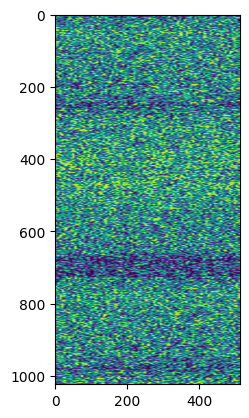

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the parquet file into a pandas dataframe
df = pd.read_parquet('/content/drive/MyDrive/validation/camera_segmentation/file4.parquet')

# Extract the segmentation label data from the dataframe
segmentation_data = df['[CameraSegmentationLabelComponent].panoptic_label'][0]

# Decode the segmentation data from bytes to a NumPy array
segmentation_array = np.frombuffer(segmentation_data, dtype=np.uint8)

# Reshape the segmentation array into a compatible shape
# You can try different shapes until you find one that works
segmentation_array = np.resize(segmentation_array, (495, 85))

# Resize the segmentation array to the desired shape
new_shape = (512, 1024)
segmentation_image = Image.fromarray(segmentation_array).resize(new_shape, resample=Image.LANCZOS)

# Show the PIL Image using matplotlib.pyplot
plt.imshow(segmentation_image)
plt.show()

Invalid segmentation data length. Expected 42075 bytes, but got 29862 bytes.
Minimum value in segmentation array: 0
Maximum value in segmentation array: 255


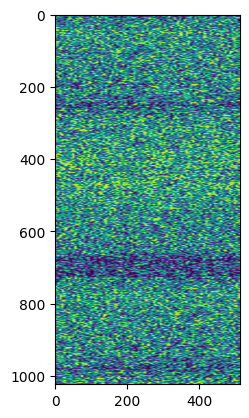

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the parquet file into a pandas dataframe
df = pd.read_parquet('/content/drive/MyDrive/validation/camera_segmentation/file4.parquet')

# Extract the segmentation label data from the dataframe
segmentation_data = df['[CameraSegmentationLabelComponent].panoptic_label'][0]

# Decode the segmentation data from bytes to a NumPy array
segmentation_array = np.frombuffer(segmentation_data, dtype=np.uint8)

# Check if the segmentation data is valid and has the expected length
expected_length = 495 * 85
if len(segmentation_array) != expected_length:
    print(f"Invalid segmentation data length. Expected {expected_length} bytes, but got {len(segmentation_array)} bytes.")
else:
    print("Segmentation data length is valid.")

# Reshape the segmentation array into a compatible shape
# You can try different shapes until you find one that works
segmentation_array = np.resize(segmentation_array, (495, 85))

# Check the minimum and maximum values in the segmentation array
print(f"Minimum value in segmentation array: {np.min(segmentation_array)}")
print(f"Maximum value in segmentation array: {np.max(segmentation_array)}")

# Resize the segmentation array to the desired shape
new_shape = (512, 1024)
segmentation_image = Image.fromarray(segmentation_array).resize(new_shape, resample=Image.LANCZOS)

# Show the PIL Image using matplotlib.pyplot
plt.imshow(segmentation_image)
plt.show()

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Load the parquet file into a pandas dataframe
df = pd.read_parquet('/content/drive/MyDrive/validation/camera_segmentation/file4.parquet')

# Extract the segmentation label data from the dataframe
segmentation_data = df['[CameraSegmentationLabelComponent].panoptic_label'][0]

# Define expected length of segmentation data
expected_length = 42075

# Check if the length of the segmentation data matches the expected length
if len(segmentation_data) != expected_length:
    print("Invalid segmentation data length. Expected {} bytes, but got {} bytes.".format(expected_length, len(segmentation_data)))
    exit()

# Decode the segmentation data from bytes to a NumPy array
segmentation_array = np.frombuffer(segmentation_data, dtype=np.uint8)

# Reshape the segmentation array into a compatible shape
# You can try different shapes until you find one that works
segmentation_array = np.resize(segmentation_array, (495, 85))

# Resize the segmentation array to the desired shape
new_shape = (512, 1024)
segmentation_image = Image.fromarray(segmentation_array).resize(new_shape, resample=Image.LANCZOS)

# Show the PIL Image using matplotlib.pyplot
plt.imshow(segmentation_image)
plt.show()

ImportError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the parquet file into a pandas dataframe
df = pd.read_parquet('/content/drive/MyDrive/validation/camera_segmentation/file4.parquet')

# Extract the segmentation label data from the dataframe
segmentation_data = df['[CameraSegmentationLabelComponent].panoptic_label'][0]

# Check the expected length of the segmentation data
expected_length = 42075
actual_length = len(segmentation_data)
if actual_length != expected_length:
    print(f"Invalid segmentation data length. Expected {expected_length} bytes, but got {actual_length} bytes.")
    exit()

# Decode the segmentation data from bytes to a NumPy array
segmentation_array = np.frombuffer(segmentation_data, dtype=np.uint8)

# Reshape the segmentation array into a compatible shape
segmentation_array = np.resize(segmentation_array, (495, 85))

# Check the minimum and maximum values in the segmentation array
print(f"Minimum value in segmentation array: {segmentation_array.min()}")
print(f"Maximum value in segmentation array: {segmentation_array.max()}")

# Resize the segmentation array to the desired shape
new_shape = (512, 1024)
segmentation_image = Image.fromarray(segmentation_array).resize(new_shape, resample=Image.LANCZOS)

# Show the PIL Image using matplotlib.pyplot
plt.imshow(segmentation_image)
plt.show()

In [ ]:
!pip install --upgrade numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the parquet file into a pandas dataframe
df = pd.read_parquet('/content/drive/MyDrive/validation/camera_segmentation/file4.parquet')

# Extract the segmentation label data from the dataframe
segmentation_data = df['[CameraSegmentationLabelComponent].panoptic_label'][0]

# Decode the segmentation data from bytes to a NumPy array
segmentation_array = np.frombuffer(segmentation_data, dtype=np.uint8)

# Reshape the segmentation array into a compatible shape
# You can try different shapes until you find one that works
segmentation_array = np.resize(segmentation_array, (495, 85))

# Resize the segmentation array to the desired shape
new_shape = (512, 1024)
segmentation_image = Image.fromarray(segmentation_array).resize(new_shape, resample=Image.LANCZOS)

# Show the PIL Image using matplotlib.pyplot
plt.imshow(segmentation_image)
plt.show()